In [2]:
# Data analysis tools
import pandas as pd

# Data visualization tools
import seaborn as sns 
import matplotlib.pyplot as plt

# Database management
import sqlite3
from sqlite3 import Error

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [20]:
# Load Yelp POI data
yelp_pois_df = pd.read_csv("../data/Yelp_POIs.csv")

yelp_pois_df.head(5)

,station_id,distance_from_station,POI_name,rating,review_count,price,address,category_names
0,af1d0f25cbc75377878349fde4d86133,206.258780,BrewDog DogHouse,4.5,48,££,99 Hutcheson Street,"['Pubs', 'Beer, Wine & Spirits', 'Barbeque']"
1,af1d0f25cbc75377878349fde4d86133,85.938424,Café Gandolfi,4.5,67,££,64 Albion Street,"['Seafood', 'British']"
2,bfdb33b93e6a6a80f01c46a8284203e0,224.454440,Hutchesons Bar & Brasserie,4.0,51,££,158 Ingram Street,"['Scottish', 'Seafood', 'Steakhouses']"
3,af1d0f25cbc75377878349fde4d86133,48.999836,The Wilson Street Pantry,4.5,88,£,6 Wilson Street,"['Cafes', 'Coffee & Tea', 'Breakfast & Brunch']"
4,af1d0f25cbc75377878349fde4d86133,54.506141,Blackfriars,4.0,59,££,36 Bell Street,['Pubs']


In [21]:
# Load citybik.es station data
stations_df = pd.read_csv("../data/citybike_stations.csv")

stations_df.head(5)

,station_id,station_name,free_bikes,empty_slots,latitude,longitude
0,af1d0f25cbc75377878349fde4d86133,Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483
1,71b02b6f26f03e58c97dec1e1c9faa00,Botanic Gardens - ELECTRIC,1,7.0,55.878278,-4.288487
2,fa6bc682e8627d66891c2b6250c81b1e,Mitchell Library,7,0.0,55.864788,-4.271852
3,a087989280fd941fd9c41c3e787940ae,University of Strathclyde (North),1,2.0,55.862983,-4.241000
4,eb47a36e3d5fe5bc456397413bd2aa75,Bridge Street Subway - ELECTRIC,5,3.0,55.852500,-4.258850


In [22]:
# Join the two tables with Pandas .merge() function
merged_df = pd.merge(yelp_pois_df, stations_df, on='station_id')

merged_df.head(5)

,station_id,distance_from_station,POI_name,rating,review_count,price,address,category_names,station_name,free_bikes,empty_slots,latitude,longitude
0,af1d0f25cbc75377878349fde4d86133,206.258780,BrewDog DogHouse,4.5,48,££,99 Hutcheson Street,"['Pubs', 'Beer, Wine & Spirits', 'Barbeque']",Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483
1,af1d0f25cbc75377878349fde4d86133,85.938424,Café Gandolfi,4.5,67,££,64 Albion Street,"['Seafood', 'British']",Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483
2,af1d0f25cbc75377878349fde4d86133,48.999836,The Wilson Street Pantry,4.5,88,£,6 Wilson Street,"['Cafes', 'Coffee & Tea', 'Breakfast & Brunch']",Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483
3,af1d0f25cbc75377878349fde4d86133,54.506141,Blackfriars,4.0,59,££,36 Bell Street,['Pubs'],Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483
4,af1d0f25cbc75377878349fde4d86133,176.960268,Babbity Bowster,4.0,33,££,16-18 Blackfriars Street,['Pubs'],Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483


In [23]:
# Add in some custom columns for easier analysis

# Fill in missing values in the 'price' column with an empty string (needed for following function)
merged_df['price'] = merged_df['price'].fillna('')

# Convert Yelps price rating (1-4 currency signs) into a 1-4 numerical value, using the length of the string
def convert_yelp_price(price):
    return len(price)
        
merged_df['price_as_num'] = merged_df['price'].apply(convert_yelp_price)

merged_df.head(5)

,station_id,distance_from_station,POI_name,rating,review_count,price,address,category_names,station_name,free_bikes,empty_slots,latitude,longitude,price_as_num
0,af1d0f25cbc75377878349fde4d86133,206.258780,BrewDog DogHouse,4.5,48,££,99 Hutcheson Street,"['Pubs', 'Beer, Wine & Spirits', 'Barbeque']",Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483,2
1,af1d0f25cbc75377878349fde4d86133,85.938424,Café Gandolfi,4.5,67,££,64 Albion Street,"['Seafood', 'British']",Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483,2
2,af1d0f25cbc75377878349fde4d86133,48.999836,The Wilson Street Pantry,4.5,88,£,6 Wilson Street,"['Cafes', 'Coffee & Tea', 'Breakfast & Brunch']",Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483,1
3,af1d0f25cbc75377878349fde4d86133,54.506141,Blackfriars,4.0,59,££,36 Bell Street,['Pubs'],Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483,2
4,af1d0f25cbc75377878349fde4d86133,176.960268,Babbity Bowster,4.0,33,££,16-18 Blackfriars Street,['Pubs'],Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483,2


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

Text(0, 0.5, 'Distance from Station')

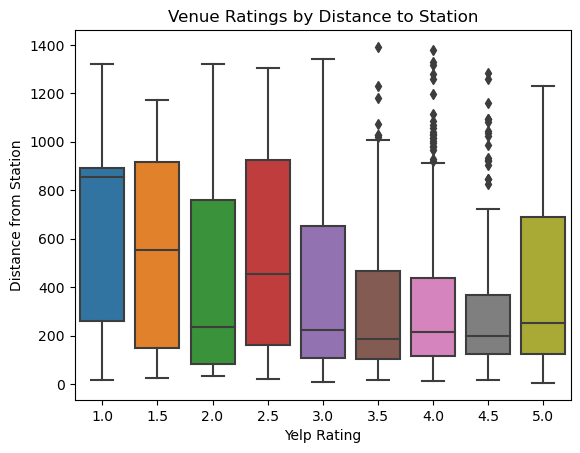

In [7]:
# Does distance from station affect the rating of the venue
# Vague correlation that venues with 4-4.5 stars are usually within 200-400m of a bike station
sns.boxplot(data=merged_df, x='rating', y='distance_from_station')
plt.title("Venue Ratings by Distance to Station")
plt.xlabel('Yelp Rating')
plt.ylabel('Distance from Station')

Text(0, 0.5, 'Ratings Submitted')

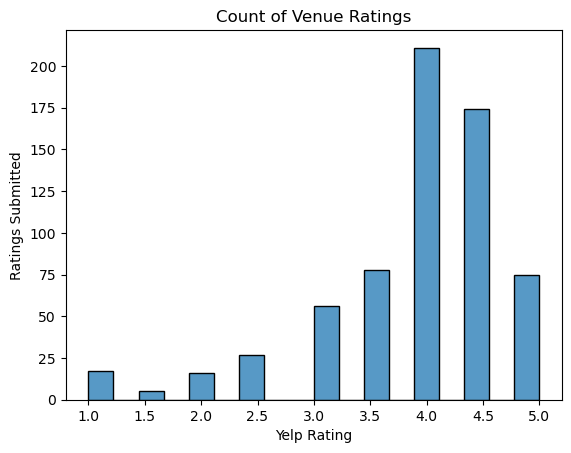

In [8]:
# It appears that the overwhemling majority of users rate either 4.0 or 4.5 stars when using Yelps platform
sns.histplot(data=merged_df, x='rating')
plt.title('Count of Venue Ratings')
plt.xlabel('Yelp Rating')
plt.ylabel('Ratings Submitted')

Text(0, 0.5, 'Yelp Rating')

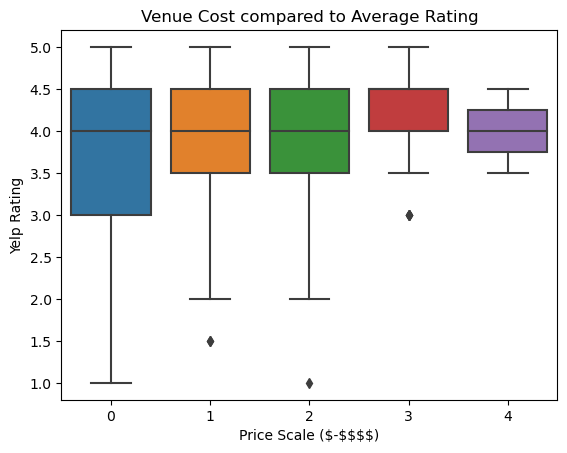

In [12]:
# From this graphic I can extrapolate that free venues/venues listed without a price tend to have a wider array
# of ratings. It also seems that the more expesive the experience is, the higher the average ratings (and tigher grouping)
sns.boxplot(data=merged_df, y='rating', x='price_as_num')
plt.title('Venue Cost compared to Average Rating')
plt.xlabel('Price Scale ($-$$$$)')
plt.ylabel('Yelp Rating')

<Figure size 10000x10000 with 0 Axes>

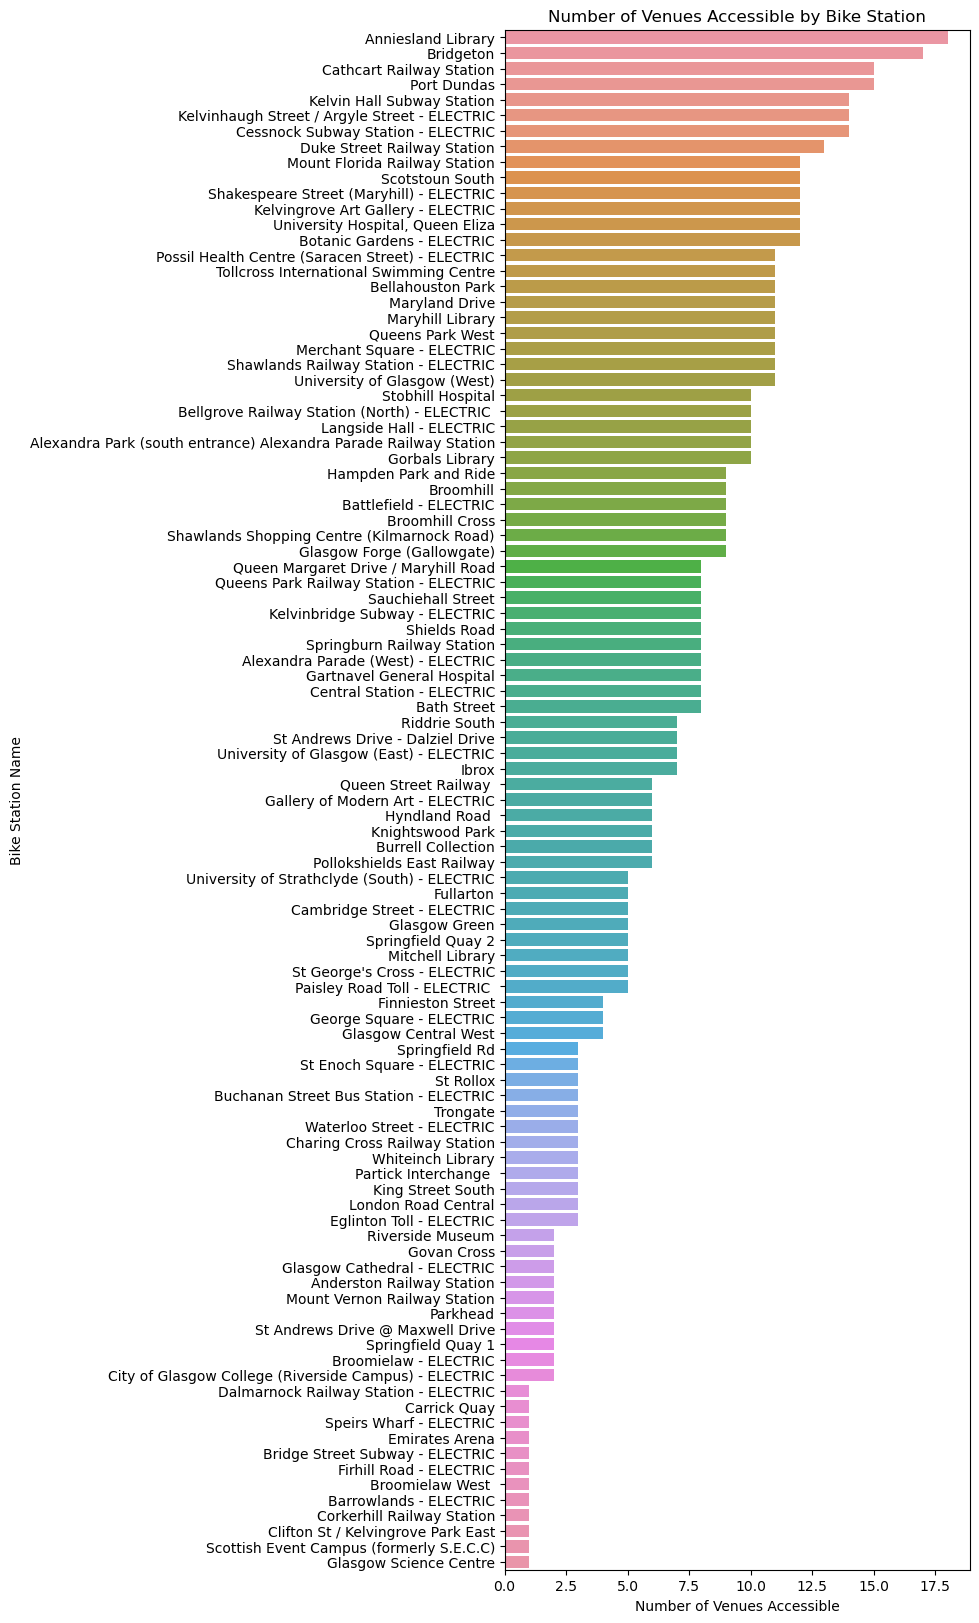

<Figure size 10000x10000 with 0 Axes>

In [26]:
# Show the amount of accesable venues per station to see if any outliers exist, or any patterns appear in the naming scheme
venue_counts = merged_df.groupby('station_name')['POI_name'].count().reset_index()
venue_counts = venue_counts.sort_values(by='POI_name', ascending=False)

# Make the plot much larger to support all of the station names
plt.figure(figsize=(6,20))

# Create a bar plot
sns.barplot(y='station_name', x='POI_name', data=venue_counts)

# Add labels and title
plt.xlabel('Number of Venues Accessible')
plt.ylabel('Bike Station Name')
plt.title('Number of Venues Accessible by Bike Station')
plt.figure(figsize=(100,100))

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [31]:
# Various SQL functions copied from the "SQL in Python" activity

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")


In [32]:
# Connect to the database. If it does not exist, create it
conn = create_connection("../data/glasgow_bike_stations_and_venues.db")

Connection to SQLite DB successful


In [33]:
# Table creation queries
create_stations_table = """
CREATE TABLE IF NOT EXISTS bike_stations (
  station_id VARCHAR(32) PRIMARY KEY NOT NULL,
  station_name TEXT NOT NULL,
  free_bikes INTEGER,
  empty_slots FLOAT,
  latitude FLOAT,
  longitude FLOAT
);
"""

create_yelp_poi_table = """
CREATE TABLE IF NOT EXISTS yelp_pois (
    station_id VARCHAR(32),
    distance_from_station FLOAT,
    POI_name TEXT PRIMARY KEY NOT NULL,
    rating FLOAT,
    review_count INTEGER,
    price VARCHAR(4),
    address TEXT,
    category_names TEXT
);
"""

result = execute_read_query(conn, create_stations_table)
result = execute_read_query(conn, create_yelp_poi_table)

In [34]:
# Use pandas to insert the data into the created tables
print("Rows Inserted:")
print(stations_df.to_sql('bike_stations', conn, if_exists='replace', index=False))
print(yelp_pois_df.to_sql('yelp_pois', conn, if_exists='replace', index=False))

Rows Inserted:
107
659


Look at the data before and after the join to validate your data.

In [35]:
# It seems like execute read query does not bring in column titles, but they are visible in a DBMS
query = "SELECT * FROM bike_stations"
# Using a dataframe to display the data, it is sourced from the db
pd.DataFrame(execute_read_query(conn, query)).head(5)

,0,1,2,3,4,5
0,af1d0f25cbc75377878349fde4d86133,Merchant Square - ELECTRIC,7,2.0,55.858167,-4.245483
1,71b02b6f26f03e58c97dec1e1c9faa00,Botanic Gardens - ELECTRIC,1,7.0,55.878278,-4.288487
2,fa6bc682e8627d66891c2b6250c81b1e,Mitchell Library,7,0.0,55.864788,-4.271852
3,a087989280fd941fd9c41c3e787940ae,University of Strathclyde (North),1,2.0,55.862983,-4.241000
4,eb47a36e3d5fe5bc456397413bd2aa75,Bridge Street Subway - ELECTRIC,5,3.0,55.852500,-4.258850


In [36]:
query = "SELECT * FROM yelp_pois"
pd.DataFrame(execute_read_query(conn, query)).head(5)

,0,1,2,3,4,5,6,7
0,af1d0f25cbc75377878349fde4d86133,206.258780,BrewDog DogHouse,4.5,48,££,99 Hutcheson Street,"['Pubs', 'Beer, Wine & Spirits', 'Barbeque']"
1,af1d0f25cbc75377878349fde4d86133,85.938424,Café Gandolfi,4.5,67,££,64 Albion Street,"['Seafood', 'British']"
2,bfdb33b93e6a6a80f01c46a8284203e0,224.454440,Hutchesons Bar & Brasserie,4.0,51,££,158 Ingram Street,"['Scottish', 'Seafood', 'Steakhouses']"
3,af1d0f25cbc75377878349fde4d86133,48.999836,The Wilson Street Pantry,4.5,88,£,6 Wilson Street,"['Cafes', 'Coffee & Tea', 'Breakfast & Brunch']"
4,af1d0f25cbc75377878349fde4d86133,54.506141,Blackfriars,4.0,59,££,36 Bell Street,['Pubs']


SQL Join

In [37]:
# Perform the join using a basic SQL query
query = """ SELECT bike_stations.station_name, 
                   free_bikes, 
                   latitude, 
                   longitude,
                   POI_name,
                   price,
                   rating,
                   address,
                   category_names
            FROM bike_stations
            JOIN yelp_pois
            ON bike_stations.station_id = yelp_pois.station_id
        """
pd.DataFrame(execute_read_query(conn, query)).head(10)

,0,1,2,3,4,5,6,7,8
0,Merchant Square - ELECTRIC,7,55.858167,-4.245483,Babbity Bowster,££,4.0,16-18 Blackfriars Street,['Pubs']
1,Merchant Square - ELECTRIC,7,55.858167,-4.245483,Bar 91,££,4.0,91 Candleriggs,['Pubs']
2,Merchant Square - ELECTRIC,7,55.858167,-4.245483,Blackfriars,££,4.0,36 Bell Street,['Pubs']
3,Merchant Square - ELECTRIC,7,55.858167,-4.245483,BrewDog DogHouse,££,4.5,99 Hutcheson Street,"['Pubs', 'Beer, Wine & Spirits', 'Barbeque']"
4,Merchant Square - ELECTRIC,7,55.858167,-4.245483,Brunswick Hotel,££,4.0,106 -108 Brunswick Street,"['Mediterranean', 'Italian']"
5,Merchant Square - ELECTRIC,7,55.858167,-4.245483,Café Gandolfi,££,4.5,64 Albion Street,"['Seafood', 'British']"
6,Merchant Square - ELECTRIC,7,55.858167,-4.245483,Gandolfi Fish To Go,££,4.5,84-86 Albion Street,['Seafood']
7,Merchant Square - ELECTRIC,7,55.858167,-4.245483,Qua Restaurant,££,4.0,68 Ingram Street,['Italian']
8,Merchant Square - ELECTRIC,7,55.858167,-4.245483,Rab Ha's,££,4.0,83 Hutcheson Street,"['Hotels', 'Pubs']"
9,Merchant Square - ELECTRIC,7,55.858167,-4.245483,The Dhabba,££,4.0,44 Candleriggs,['Indian']
